# Classifying medicinal vs non-medicinal plants

# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load data

In [2]:
df_classy_norm = pd.read_csv('classyfire_family_norm.csv', sep=',')
df_np_norm = pd.read_csv('npclassifier_family_norm.csv', sep=',')

# Classyfire plant classification (norm)

## Data exploration

In [3]:
df_classy_norm.head(3)

,family,ftype,Organic disulfides,Sulfonyls,Pyrroles,Quinolines and derivatives,Tetrathianes,Oxanes,Pyrrolines,Azepanes,...,Oxazinanes,Benzoxazines,Polycyclic hydrocarbons,Cinnamic acids and derivatives,Diazanaphthalenes,Dithiolanes,Fatty Acyls,Sulfenyl compounds,Pyridines and derivatives,Organonitrogen compounds
0,ncbitaxon:27065,Medicinal,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.04,0.080000
1,ncbitaxon:27065,Non-medicinal,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.00,0.000000
2,ncbitaxon:3615,Medicinal,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.019608


In [4]:
df_classy_norm.shape

(118, 84)

In [5]:
# Get the frequency of each ftype (medicinal vs non-medicinal plants)
df_classy_norm['ftype'].value_counts()

Medicinal        59
Non-medicinal    59
Name: ftype, dtype: int64

In [6]:
# Get summary stats for each column
df_classy_norm.describe()

,Organic disulfides,Sulfonyls,Pyrroles,Quinolines and derivatives,Tetrathianes,Oxanes,Pyrrolines,Azepanes,Pyrrolizidines,Phenols,...,Oxazinanes,Benzoxazines,Polycyclic hydrocarbons,Cinnamic acids and derivatives,Diazanaphthalenes,Dithiolanes,Fatty Acyls,Sulfenyl compounds,Pyridines and derivatives,Organonitrogen compounds
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.002144,0.002245,0.000074,0.002201,0.000058,0.002130,0.000273,0.000035,0.001863,0.003411,...,0.000029,0.000303,0.000675,0.002259,0.000799,0.000060,0.229353,0.001776,0.018608,0.015877
std,0.008929,0.012703,0.000576,0.011566,0.000631,0.008641,0.001790,0.000383,0.008386,0.009751,...,0.000316,0.003288,0.003789,0.007533,0.005845,0.000479,0.121612,0.010835,0.051252,0.033226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218254,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312500,0.000000,0.011444,0.019608
max,0.052632,0.125000,0.005263,0.080000,0.006849,0.066667,0.015152,0.004158,0.058824,0.058824,...,0.003436,0.035714,0.035714,0.050000,0.058824,0.004587,0.764706,0.100000,0.333333,0.238095


In [7]:
# Drop columns where all values are 0
df_classy_norm = df_classy_norm.loc[:, (df_classy_norm != 0).any(axis=0)]

In [8]:
df_classy_norm.shape

(118, 78)

<ipython-input-9-f97581930f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_classy_norm.corr(), cmap='viridis', figsize=(20, 20))


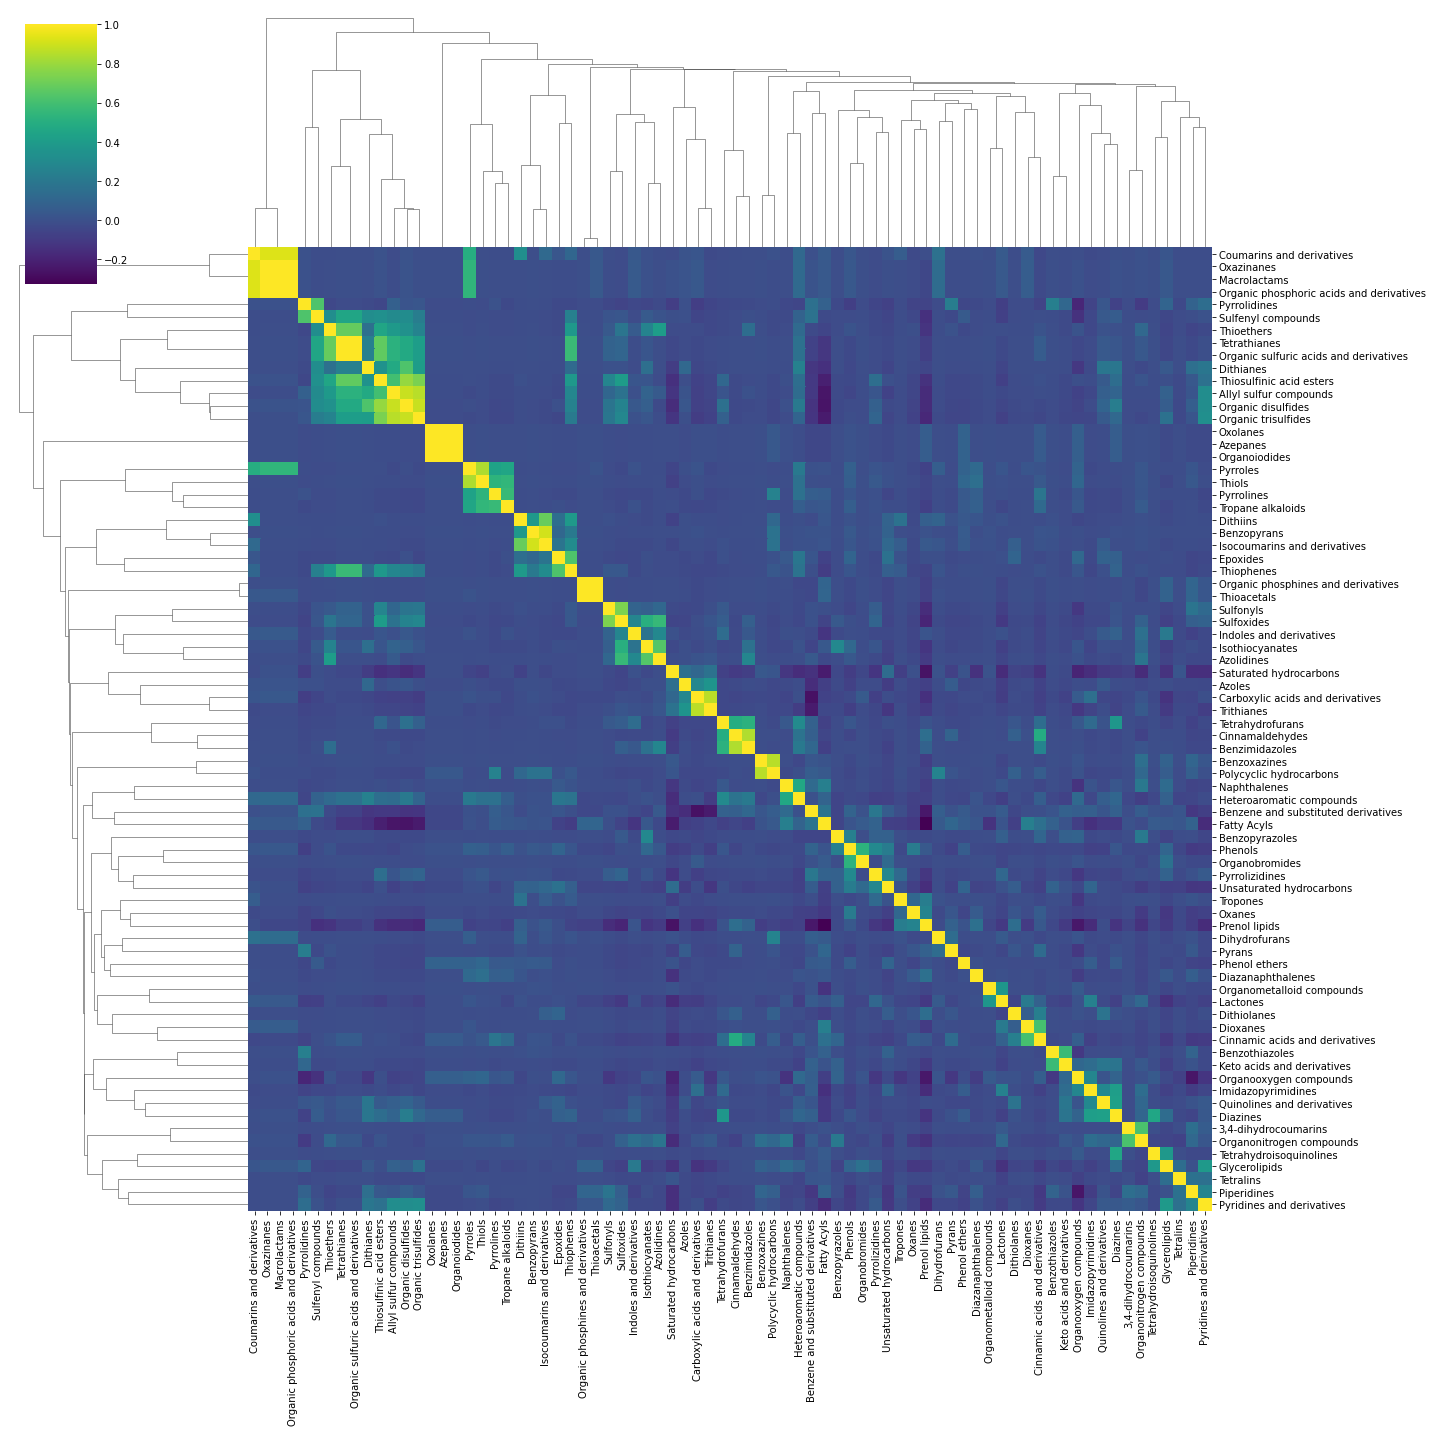

In [9]:
# Data viz
sns.clustermap(df_classy_norm.corr(), cmap='viridis', figsize=(20, 20))

## Build model

In [10]:
# Separate data into features and target
input_features_cf = df_classy_norm.drop(['ftype', 'family'], axis=1)
target_cf = df_classy_norm['ftype']

In [11]:
input_features_cf.head(3)

,Organic disulfides,Sulfonyls,Pyrroles,Quinolines and derivatives,Tetrathianes,Oxanes,Pyrrolines,Azepanes,Pyrrolizidines,Phenols,...,Oxazinanes,Benzoxazines,Polycyclic hydrocarbons,Cinnamic acids and derivatives,Diazanaphthalenes,Dithiolanes,Fatty Acyls,Sulfenyl compounds,Pyridines and derivatives,Organonitrogen compounds
0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.04,0.080000
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.00,0.000000
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.019608


In [12]:
target_cf

0          Medicinal
1      Non-medicinal
2          Medicinal
3      Non-medicinal
4          Medicinal
           ...      
113    Non-medicinal
114        Medicinal
115    Non-medicinal
116        Medicinal
117    Non-medicinal
Name: ftype, Length: 118, dtype: object

In [13]:
# Split data into training and test sets
X_train_cf, X_test_cf, y_train_cf, y_test_cf = train_test_split(input_features_cf, target_cf, test_size=0.2, random_state=5)


In [14]:
# Train model
logistic_regression_cf = LogisticRegression()
logistic_regression_cf.fit(X_train_cf, y_train_cf)

LogisticRegression()

## Evaluate model

In [15]:
# Test model
y_pred_cf = logistic_regression_cf.predict(X_test_cf)

In [16]:
# Evaluate model
accuracy_score(y_test_cf, y_pred_cf)

0.5

In [17]:
# Predict probability of plant class labels
logistic_regression_cf.predict_proba(X_test_cf)

array([[0.48368049, 0.51631951],
       [0.51051996, 0.48948004],
       [0.53623931, 0.46376069],
       [0.53803709, 0.46196291],
       [0.52009052, 0.47990948],
       [0.56059436, 0.43940564],
       [0.49741578, 0.50258422],
       [0.53383534, 0.46616466],
       [0.53468161, 0.46531839],
       [0.54195685, 0.45804315],
       [0.55049167, 0.44950833],
       [0.46884213, 0.53115787],
       [0.50828226, 0.49171774],
       [0.56858393, 0.43141607],
       [0.47993074, 0.52006926],
       [0.53305887, 0.46694113],
       [0.54473024, 0.45526976],
       [0.48112775, 0.51887225],
       [0.51258522, 0.48741478],
       [0.55064408, 0.44935592],
       [0.52852706, 0.47147294],
       [0.52480928, 0.47519072],
       [0.5394988 , 0.4605012 ],
       [0.5015219 , 0.4984781 ]])

# NP plant classification (norm)

## Data exploration

In [18]:
df_np_norm.head(3)

,family,ftype,Jasmonic acids,Ansa peptide alkaloids,Acutumine alkaloids,Carboline alkaloids,Pinguisane sesquiterpenoids,Other Docosanoids,Oligomeric stibenes,Simple indole alkaloids,...,Herbertane sesquiterpenoids,Mycolic acids,Azaphilones,Lobane diterpenoids,Mycosporine and Mycosporine-like amino acids,Carbazole alkaloids,Gibberellins,4-pyrone derivatives,Usnic acid and derivatives,Miscellaneous apocarotenoids
0,ncbitaxon:27065,Medicinal,0.017903,0.0,0.0,0.0,0.0,0.0,0.0,0.002558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023018,0.0,0.0,0.0
1,ncbitaxon:27065,Non-medicinal,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,ncbitaxon:23097,Medicinal,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [19]:
df_np_norm.shape

(406, 526)

In [20]:
# Get the frequency of each ftype (medicinal vs non-medicinal plants)
df_np_norm['ftype'].value_counts()

Medicinal        203
Non-medicinal    203
Name: ftype, dtype: int64

In [21]:
# Get summary stats for each column
df_np_norm.describe()

,Jasmonic acids,Ansa peptide alkaloids,Acutumine alkaloids,Carboline alkaloids,Pinguisane sesquiterpenoids,Other Docosanoids,Oligomeric stibenes,Simple indole alkaloids,Spirovetivane sesquiterpenoids,Pregnane steroids,...,Herbertane sesquiterpenoids,Mycolic acids,Azaphilones,Lobane diterpenoids,Mycosporine and Mycosporine-like amino acids,Carbazole alkaloids,Gibberellins,4-pyrone derivatives,Usnic acid and derivatives,Miscellaneous apocarotenoids
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.000000,4.060000e+02,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,0.000281,0.000340,0.000029,0.007284,0.000010,0.000005,0.004774,0.003690,0.000083,0.005170,...,0.000217,0.000014,0.000231,5.883130e-07,0.000129,0.001657,0.005803,0.000170,0.000027,0.000346
std,0.002358,0.005013,0.000585,0.030107,0.000179,0.000108,0.025879,0.013790,0.000605,0.018066,...,0.002665,0.000257,0.001332,8.431149e-06,0.002375,0.012459,0.052542,0.000897,0.000201,0.005566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001619,0.000000,0.000941,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.040000,0.093995,0.011790,0.303571,0.003571,0.002179,0.263158,0.176471,0.007259,0.161538,...,0.051282,0.005155,0.011765,1.336362e-04,0.047619,0.202703,1.000000,0.014151,0.002770,0.111111


In [22]:
# Drop columns where all values are 0
df_np_norm = df_np_norm.loc[:, (df_np_norm != 0).any(axis=0)]

In [23]:
df_np_norm.shape

(406, 520)

<ipython-input-24-7957dd1e595c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_np_norm.corr(), cmap='viridis', figsize=(20, 20))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


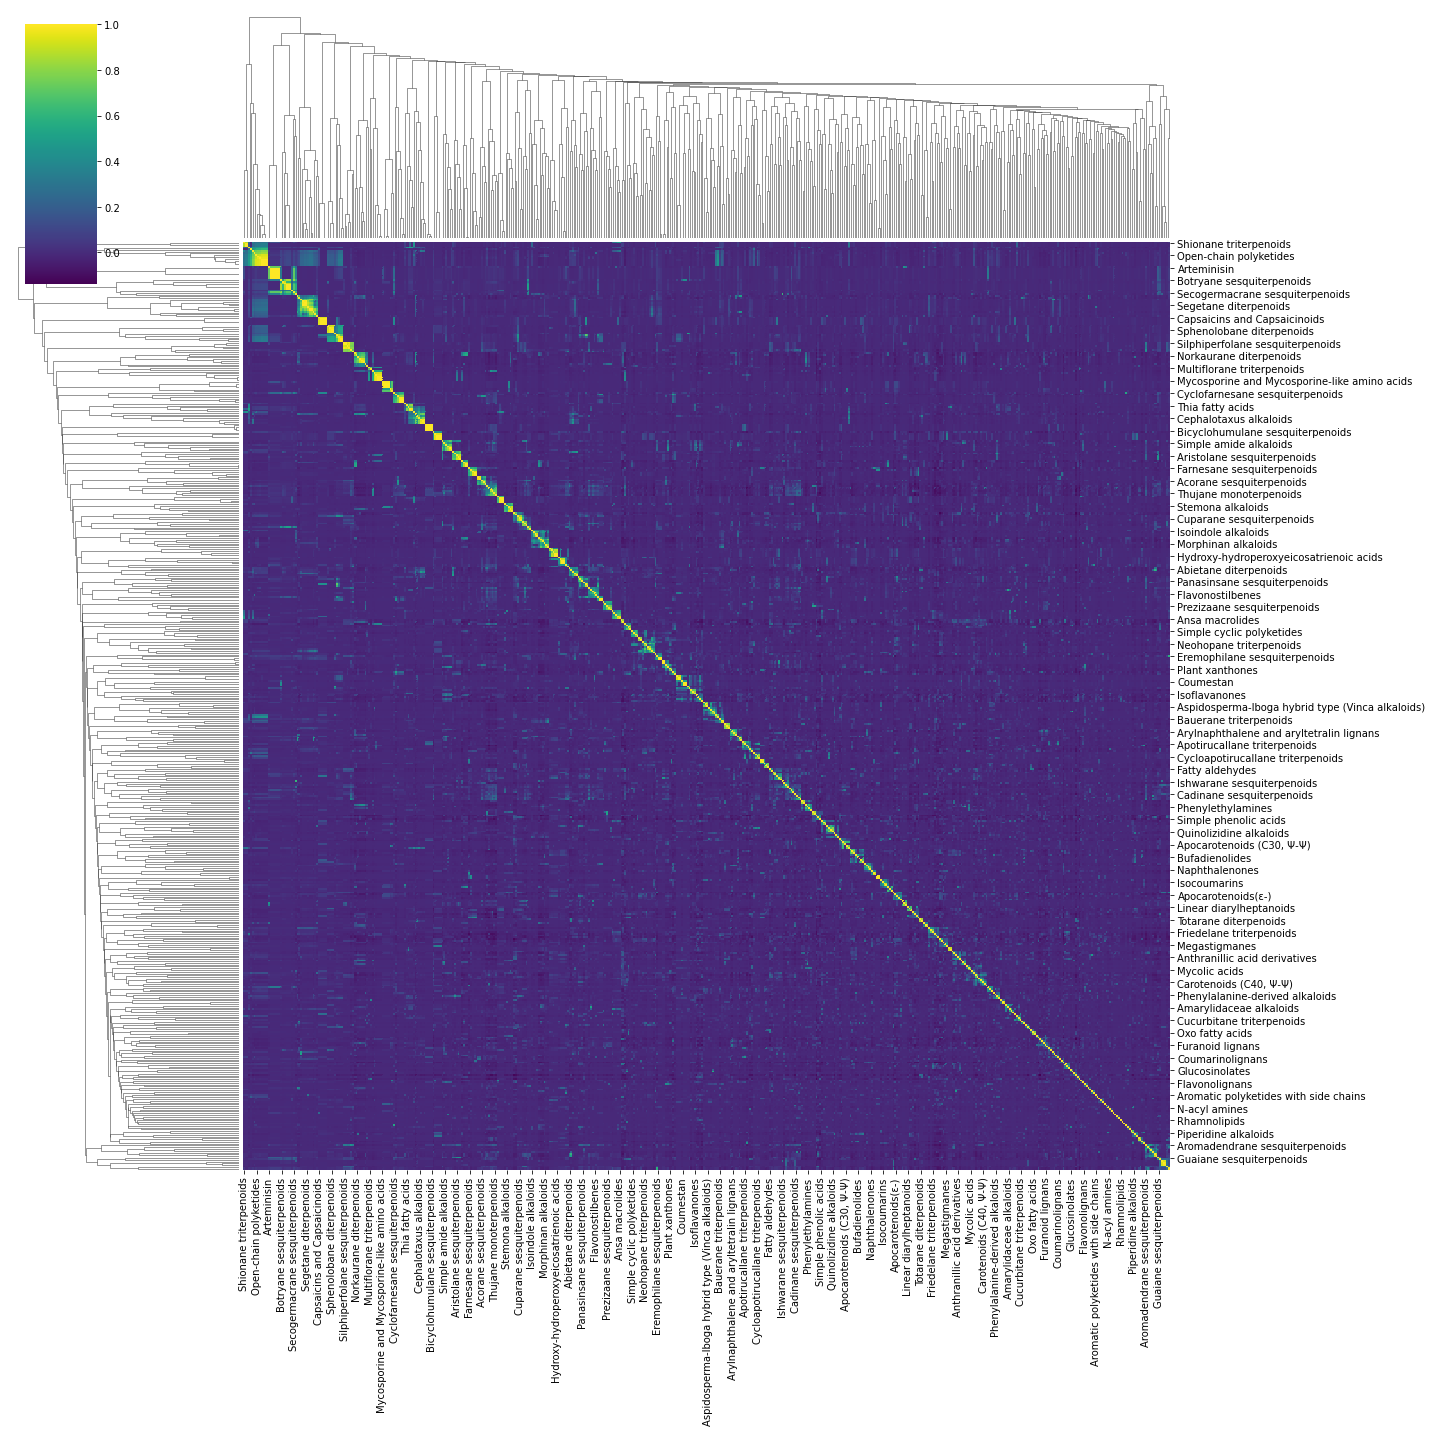

In [24]:
# Visualize correlations between pairs of features
sns.clustermap(df_np_norm.corr(), cmap='viridis', figsize=(20, 20))

## Build model

In [25]:
# Separate data into features and target
input_features_np = df_np_norm.drop(['ftype', 'family'], axis=1)
target_np = df_np_norm['ftype']


In [26]:
input_features_np.head(3)

,Jasmonic acids,Ansa peptide alkaloids,Acutumine alkaloids,Carboline alkaloids,Pinguisane sesquiterpenoids,Other Docosanoids,Oligomeric stibenes,Simple indole alkaloids,Spirovetivane sesquiterpenoids,Pregnane steroids,...,Herbertane sesquiterpenoids,Mycolic acids,Azaphilones,Lobane diterpenoids,Mycosporine and Mycosporine-like amino acids,Carbazole alkaloids,Gibberellins,4-pyrone derivatives,Usnic acid and derivatives,Miscellaneous apocarotenoids
0,0.017903,0.0,0.0,0.0,0.0,0.0,0.0,0.002558,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023018,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [27]:
target_np

0          Medicinal
1      Non-medicinal
2          Medicinal
3      Non-medicinal
4          Medicinal
           ...      
401    Non-medicinal
402        Medicinal
403    Non-medicinal
404        Medicinal
405    Non-medicinal
Name: ftype, Length: 406, dtype: object

In [28]:
# Split data into training and test sets
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(input_features_np, target_np, test_size=0.2, random_state=5)


In [29]:
# Train model
logistic_regression_np = LogisticRegression()
logistic_regression_np.fit(X_train_np, y_train_np)

LogisticRegression()

## Evaluate model

In [30]:
# Test model
y_pred_np = logistic_regression_np.predict(X_test_np)

In [31]:
# Evaluate model
accuracy_score(y_test_np, y_pred_np)

0.5365853658536586

In [32]:
# Predict probability of plant class labels
logistic_regression_np.predict_proba(X_test_np)

array([[0.45485914, 0.54514086],
       [0.49950753, 0.50049247],
       [0.53382589, 0.46617411],
       [0.50600089, 0.49399911],
       [0.44698574, 0.55301426],
       [0.48830663, 0.51169337],
       [0.49669435, 0.50330565],
       [0.50080119, 0.49919881],
       [0.49549588, 0.50450412],
       [0.48859829, 0.51140171],
       [0.44434101, 0.55565899],
       [0.50924862, 0.49075138],
       [0.43644811, 0.56355189],
       [0.55281075, 0.44718925],
       [0.4956355 , 0.5043645 ],
       [0.50488104, 0.49511896],
       [0.50583878, 0.49416122],
       [0.4736909 , 0.5263091 ],
       [0.51726196, 0.48273804],
       [0.51091818, 0.48908182],
       [0.48769686, 0.51230314],
       [0.51676155, 0.48323845],
       [0.44546804, 0.55453196],
       [0.52307817, 0.47692183],
       [0.45103558, 0.54896442],
       [0.52484799, 0.47515201],
       [0.48277458, 0.51722542],
       [0.51130553, 0.48869447],
       [0.48056996, 0.51943004],
       [0.52541606, 0.47458394],
       [0.